In [441]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [442]:
def read_data(path):
    df = pd.read_csv(path)
    df['id'] = df['id'].astype(str)
    df['id'] = df['id'].apply(lambda x: f'{int(x):013}' if pd.notnull(x) else x)

    return df

In [443]:
def fill_na_with_linear_reg(df):
    temp_df = df.copy()

    for col in range(len(temp_df)):
    # Get the index of NaN values in the first row
        na_index = temp_df.iloc[col].isna()[temp_df.iloc[col].isna()].index

    # Prepare the training data
        temp_train = temp_df.iloc[col].dropna()
        y = temp_train.astype(float).values.reshape(-1, 1)
        x = temp_train.index.astype(int).values.reshape(-1, 1)

    # Fit the linear regression model
        model = LinearRegression().fit(X=x, y=y)

    # Predict the NaN values
        for value in na_index:
            na = model.predict(np.array([[float(value)]]))
            temp_df.iloc[col][value] = na
    
    return temp_df

In [444]:
def extract_series(df):
    df_temp = df
    # Convert 'id' column to string type
    df_temp['id'] = df_temp['id'].astype(str)
    # Add a new column 'series' which is the first three digits of 'id'
    df_temp['series'] = df_temp['id'].str[:3].astype(int)

    # Read the series.csv file
    series = pd.read_csv('Series Name.csv')

    # Merge data with series on the 'series' column from data and 'series_id' column from series
    df_temp_1 = df_temp.merge(series, left_on='series', right_on='Series Name ID', how='left')

    cols = df_temp_1.columns.tolist()
    cols.insert(1, cols.pop(cols.index('Series Name')))
    df_temp_1 = df_temp_1[cols]
    df_temp_1.drop(columns=['Series Name ID', 'series'], inplace=True)

    return df_temp_1

In [445]:
def extract_contry(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['country'] = df_temp['id'].str[3:5].astype(int)

# Read the country.csv file
    country = pd.read_csv('Country Name.csv')

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(country, left_on='country', right_on='Country Name ID', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(2, cols.pop(cols.index('Country Name')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['Country Name ID', 'country'], inplace=True)
    
    return df_temp_1

In [446]:
def extract_category(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['category'] = df_temp['id'].str[5:7].astype(int)

# Read the country.csv file
    category = pd.read_excel('category_id.xlsx')

# Rename the 'id' column in the country dataframe to 'country_id'
    category.rename(columns={'id': 'category_id'}, inplace=True)

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(category, left_on='category', right_on='category_id', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(3, cols.pop(cols.index('Category')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['category_id', 'category'], inplace=True)

    return df_temp_1

In [447]:
def extract_specific_series(code):
    df = read_data('raw_clean.csv')
    df_temp = df[df['id'].str[:3] == code]
    df_temp = df_temp.set_index('id')
    df_clean = fill_na_with_linear_reg(df_temp)
    df_reset = df_clean.reset_index()
    df_series = extract_series(df_reset)
    df_country = extract_contry(df_series)
    df_category = extract_category(df_country)
    
    return df_category

In [448]:
def getting_category(category):
    df = pd.read_excel('data.xlsx')
    df_temp = df[df['Category'] == category]
    df_transpose = df_temp.transpose()
    df_drop_id = df_transpose.drop(df_transpose.index[0])
    df_drop_id.columns = df_drop_id.loc['Country Name'] + '_' + df_drop_id.loc['Series Name']
    df_drop_id = df_drop_id.drop(df_drop_id.index[0:3])
    
    return df_drop_id

In [449]:
raw = read_data('raw_clean.csv')
raw.index = raw['id']
raw = raw.drop(columns='id')

In [450]:
#Drop many NA values data
na_threshold = 0.1
na = len(raw.columns) * na_threshold

# Count the number of NaN values in each row
na_counts = raw.isna().sum(axis=1)
raw_na = raw[na_counts < na]

In [451]:
# Drop stable data
std = raw_na.std(axis=1)
raw_std = raw_na[std != 0]

In [452]:
data = fill_na_with_linear_reg(raw_std)

/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_8442/1658861518.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_df.iloc[col][value] = na
/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_8442/1658861518.py:19: F

In [453]:
data.to_csv('cleaned_data.csv')

In [454]:
data = read_data('cleaned_data.csv')

data_series = extract_series(data)
data_country = extract_contry(data_series)
data_category = extract_category(data_country)

In [455]:
clean_data = data_category
clean_data.to_excel('data.xlsx', index=False)

In [456]:
clean_data.groupby('Country Name').count()['id']

Country Name
Afghanistan         131
Australia           254
Austria             212
Bangladesh          289
Belgium             199
Canada              242
Chad                225
China               293
Congo, Dem. Rep.    237
Denmark             240
Ethiopia            262
Finland             243
France              254
Germany             249
India               298
Ireland             203
Italy               247
Japan               235
Kenya               286
Korea, Rep.         267
Madagascar          272
Malawi              243
Mozambique          245
Myanmar             193
Nepal               284
Netherlands         244
New Zealand         197
Nigeria             232
Norway              247
Pakistan            291
Singapore           238
South Sudan          42
Sweden              248
Switzerland         239
Tanzania            276
Uganda              263
United Kingdom      242
United States       244
Yemen, Rep.         149
Zimbabwe            247
Name: id, dtype: int64

In [457]:
clean_data.groupby('Category').count()['id']

Category
Cultural           75
Economical       3841
Environmental    3342
Political         635
Social           1609
Name: id, dtype: int64

In [458]:
clean_data.groupby(['Country Name', 'Category']).count()['id'].to_csv('data_distribution.csv')

In [459]:
#clean_gdp = data_category[data_category['Series Name'].str.contains('GDP')]
#clean_gdp['Series Name'].unique()
#clean_currentUS = data_category[data_category['Series Name'].str.contains('current US')]
#clean_currentUS['Series Name'].unique
#clean_constant = data_category[data_category['Series Name'].str.contains('constant')]

In [460]:
getting_category('Social').to_excel('social.xlsx', index=False)
getting_category('Political').to_excel('political.xlsx', index=False)
getting_category('Economical').to_excel('economic.xlsx', index=False)
getting_category('Environmental').to_excel('environmental.xlsx', index=False)
getting_category('Cultural').to_excel('cultural.xlsx', index=False)

In [461]:
y_nf = pd.read_excel('qol_raw.xlsx')

y_nf.index = y_nf['Indicator Name']
y_nf.drop(columns=['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code'], inplace=True)
y_nf = y_nf.replace("..", np.nan)
y_nf_clean = fill_na_with_linear_reg(y_nf)

/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_8442/2241493335.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_nf = y_nf.replace("..", np.nan)
/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_8442/1658861518.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df

In [462]:
y_nf_normal = y_nf_clean

for col in range(len(df)):
    y_nf_normal.iloc[col] = (y_nf_clean.iloc[col] - y_nf_clean.iloc[col].min()) / (y_nf_clean.iloc[col].max() - y_nf_clean.iloc[col].min())

In [463]:
y_nf_formula = {'Health': [0.9, 0.1],
                'Education': [0.8, 0.2],
                'infrastructure': [0.5, 0.5],
                'environmental': [0.2, 0.8],
                'social_inclusion': [0.9, 0.1]
                }

health = y_nf_formula['Health'][0] * y_nf_normal.loc['Life expectancy at birth, total (years)'] + y_nf_formula['Health'][1] * (1 - y_nf_normal.loc['Mortality rate, infant (per 1,000 live births)'])
education = y_nf_formula['Education'][0] * y_nf_normal.loc['Primary completion rate, total (% of relevant age group)'] + y_nf_formula['Education'][1] * (y_nf_normal.loc['Literacy rate (%)'])
infrastructure = y_nf_formula['infrastructure'][0] * (1 - y_nf_normal.loc['Time required to get electricity (days)']) + y_nf_formula['infrastructure'][1] * (y_nf_normal.loc['Individuals using the Internet (% of population)'])
environmental = y_nf_formula['environmental'][0] * (1 - y_nf_normal.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']) + y_nf_formula['environmental'][1] * (y_nf_normal.loc['Annual freshwater withdrawals, total (billion cubic meters)'])
social_inclusion = y_nf_formula['social_inclusion'][0] * (1 - y_nf_normal.loc['Poverty headcount ratio at societal poverty line (% of population)']) + y_nf_formula['social_inclusion'][1] * (y_nf_normal.loc['World medium voter turnout in election'])

qol = health * 0.3 + education * 0.3 + infrastructure * 0.2 + environmental * 0.1 + social_inclusion * 0.1
qol.to_csv('qol.csv')

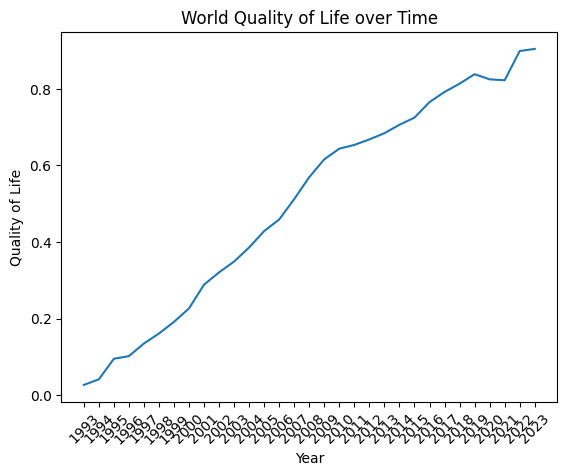

In [464]:
plt.plot(qol)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Quality of Life')
plt.title('World Quality of Life over Time')
plt.show()


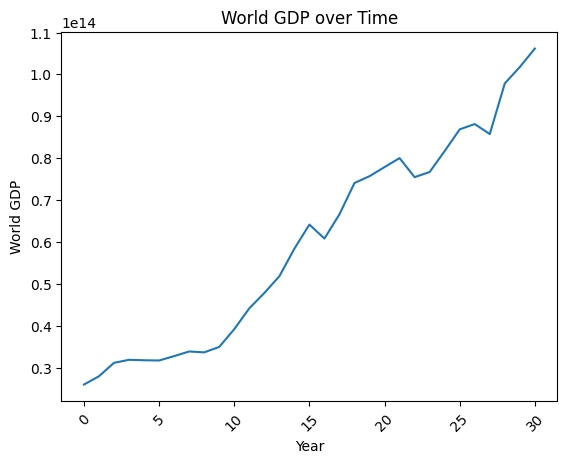

In [465]:
gdp = pd.read_csv('gdp.csv')
gdp.set_index(gdp.columns[0], inplace=True)
plt.plot(gdp.values)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('World GDP')
plt.title('World GDP over Time')
plt.show()